In [1]:
# import packages we need for exploratory data analysis (EDA)
import pandas as pd # to store tabular data
import numpy as np # to do some math
import matplotlib.pyplot as plt # a popular data visualization tool
import seaborn as sns # another popular data visualization tool
%matplotlib inline
plt.style.use('fivethirtyeight') # a popular data visualization theme

In [2]:
# load in our dataset using pandas
pima = pd.read_csv('./data/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Our number of missing values is (incorrectly) 0
pima['Insulin'].isnull().sum() #serum insulin

0

In [4]:
#manually replace all 0's with a None value
pima['Insulin'] = pima['Insulin'].map(lambda x:x if x != 0 else None)


In [5]:
# check the number of mssing values again
pima['Insulin'].isnull().sum()

374

In [6]:
# A little faster now for all columns
columns = ['Insulin','BMI','Glucose','BloodPressure']

for col in columns:
    pima[col].replace([0],[None],inplace=True)

In [7]:
pima.isnull().sum() # this makes more sense now!

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,0,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [9]:
pima.describe() # grab some descriptive statistics

,Pregnancies,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,394.000000,768.000000,768.000000,768.000000
mean,3.845052,20.536458,155.548223,0.471876,33.240885,0.348958
std,3.369578,15.952218,118.775855,0.331329,11.760232,0.476951
min,0.000000,0.000000,14.000000,0.078000,21.000000,0.000000
25%,1.000000,0.000000,76.250000,0.243750,24.000000,0.000000
50%,3.000000,23.000000,125.000000,0.372500,29.000000,0.000000
75%,6.000000,32.000000,190.000000,0.626250,41.000000,1.000000
max,17.000000,99.000000,846.000000,2.420000,81.000000,1.000000


In [10]:
pima['Glucose'].mean(), pima['Glucose'].std()

(121.6867627785059, 30.53564107280403)

### Removing Harmful Rows of Data

In [11]:
# drop the rows with missing values
pima_dropped = pima.dropna()

In [12]:
num_rows_lost = round(100*(pima.shape[0] - pima_dropped.shape[0])/float(pima.shape[0]))

print("retained {}% of rows".format(num_rows_lost))
# lost over half of the rows!

retained 49% of rows


In [13]:
# some EDA of the dataset before it was dropped and after

# split of trues and falses before rows dropped
pima['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [14]:
# the split of trues and falses stay relatively the same
pima_dropped['Outcome'].value_counts(normalize=True)

0    0.668367
1    0.331633
Name: Outcome, dtype: float64

In [15]:
# the mean values of each column (excluding missing values)
pima.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                20.536458
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [16]:
# the mean values of each column (with missing values rows dropped)
pima_dropped.mean()

Pregnancies                   3.301020
Glucose                     122.627551
BloodPressure                70.663265
SkinThickness                29.145408
Insulin                     156.056122
BMI                          33.086224
DiabetesPedigreeFunction      0.523046
Age                          30.864796
Outcome                       0.331633
dtype: float64

In [17]:
# % change in means
(pima_dropped.mean() - pima.mean()) / pima.mean()

Pregnancies                -0.141489
Glucose                     0.007731
BloodPressure              -0.024058
SkinThickness               0.419203
Insulin                     0.003265
BMI                         0.019372
DiabetesPedigreeFunction    0.108439
Age                        -0.071481
Outcome                    -0.049650
dtype: float64

Text(0,0.5,'% change')

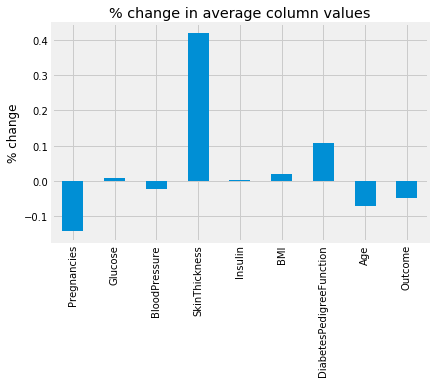

In [19]:
# % change in means as a bar chart
ax = ((pima_dropped.mean() - pima.mean()) / pima.mean()).plot(kind='bar', color='#008fd5', title='% change in average column values')
ax.set_ylabel('% change')



In [24]:
# now lets do some machine learning
# note we are using the dataset with the dropped rows

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_dropped = pima_dropped.drop('Outcome', axis = 1)
#create our feature matrix by removing the response variable
print("learning from {} rows".format(X_dropped.shape[0]))
y_dropped=pima_dropped['Outcome']

# our grid search variables and instances

# KNN parameters to try
knn_params = {'n_neighbors':[1,2,3,4,5,6,7]}

knn=KNeighborsClassifier()  # instantiate a KNN model

grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)

print(grid.best_score_, grid.best_params_) # but we are learning from way fewer rows



learning from 392 rows
0.7448979591836735 {'n_neighbors': 7}


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
X_dropped = pima_dropped.drop('Outcome', axis=1)
# create our feature matrix by removing the respose variable
print("learning from {} rows".format(X_dropped.shape[0]))

learning from 392 rows


In [27]:
y_dropped = pima_dropped['Outcome']

In [30]:
# our grid search variables and instances

# KNN parameters to try

knn_params = {'n_neighbors':[1,2,3,4,5,6,7]}

In [31]:
grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)

print(grid.best_score_, grid.best_params_)
# but we are learning from way fewer rows

0.7448979591836735 {'n_neighbors': 7}


In [32]:
pima.isnull().sum() # let's fill in the plasma column

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [33]:
empty_plasma_index = pima[pima['Glucose'].isnull()].index
pima.loc[empty_plasma_index]['Glucose']

75     None
182    None
342    None
349    None
502    None
Name: Glucose, dtype: object